In [17]:
import torchvision
import torch
import torchvision.transforms as T
import numpy as np

In [3]:
stl_10_dataset = torchvision.datasets.STL10(root="/home/chenty/workspace/data/stl10",download=True)


  0%|          | 0/2640397119 [00:00<?, ?it/s]

Extracting /home/chenty/workspace/data/stl10/stl10_binary.tar.gz to /home/chenty/workspace/data/stl10


airplane


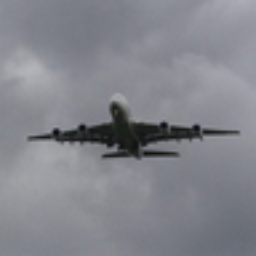

In [201]:
image_idx = 30
size = (256, 256)
classes = stl_10_dataset.classes
stl10_image, label_id = stl_10_dataset[image_idx]
print(classes[label_id])
T.Resize(size=size)(stl10_image)

In [140]:
print(classes)

['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


In [177]:
food101_dataset = torchvision.datasets.Food101(root="/home/chenty/workspace/data/food101",download=True)

AttributeError: module 'torchvision' has no attribute 'datasetsOxfordIIITPet'

sashimi


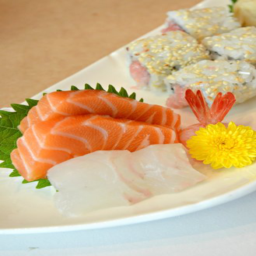

In [202]:
image_idx = 2467
size = (256, 256)
classes = food101_dataset.classes
food_image, label_id = food101_dataset[image_idx]
print(classes[label_id])
T.Resize(size=size)(food_image)

In [179]:
pets_dataset = torchvision.datasets.OxfordIIITPet(root="/home/chenty/workspace/data/OxfordIIITPet1",download=True)

  0%|          | 0/791918971 [00:00<?, ?it/s]

Extracting /home/chenty/workspace/data/OxfordIIITPet1/oxford-iiit-pet/images.tar.gz to /home/chenty/workspace/data/OxfordIIITPet1/oxford-iiit-pet


  0%|          | 0/19173078 [00:00<?, ?it/s]

Extracting /home/chenty/workspace/data/OxfordIIITPet1/oxford-iiit-pet/annotations.tar.gz to /home/chenty/workspace/data/OxfordIIITPet1/oxford-iiit-pet


British Shorthair


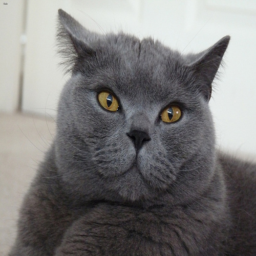

In [203]:
image_idx = 458
size = (256, 256)
classes = pets_dataset.classes
pets_image, label_id = pets_dataset[image_idx]
print(classes[label_id])
T.Resize(size=size)(pets_image)

In [227]:
classes

['Abyssinian',
 'American Bulldog',
 'American Pit Bull Terrier',
 'Basset Hound',
 'Beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'Boxer',
 'British Shorthair',
 'Chihuahua',
 'Egyptian Mau',
 'English Cocker Spaniel',
 'English Setter',
 'German Shorthaired',
 'Great Pyrenees',
 'Havanese',
 'Japanese Chin',
 'Keeshond',
 'Leonberger',
 'Maine Coon',
 'Miniature Pinscher',
 'Newfoundland',
 'Persian',
 'Pomeranian',
 'Pug',
 'Ragdoll',
 'Russian Blue',
 'Saint Bernard',
 'Samoyed',
 'Scottish Terrier',
 'Shiba Inu',
 'Siamese',
 'Sphynx',
 'Staffordshire Bull Terrier',
 'Wheaten Terrier',
 'Yorkshire Terrier']

In [21]:
T.ToTensor()(image).shape

torch.Size([3, 96, 96])

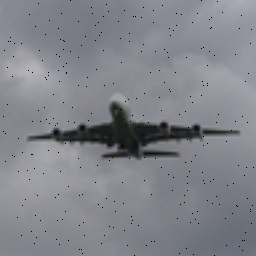

In [214]:
def whitening(pic):
    '''
    pic is an PIL image
    '''
    pic = T.Resize(size=size)(pic)
    mask = torch.rand(size) > 0.005
    mask = mask.unsqueeze(dim=0)
    real_mask = torch.concat([mask, mask, mask], dim=0)
    pic_tensors = T.ToTensor()(pic)
    pic_after = real_mask*pic_tensors
    return T.ToPILImage()(pic_after)
    
whitening(stl10_image)

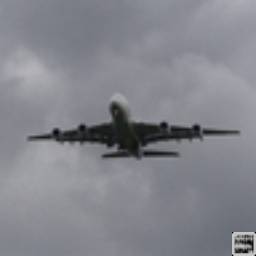

In [212]:
def corner(pic):
    '''
    pic is an PIL Image
    '''
    trigger = torchvision.io.read_image("example_trigger.png")
    mask = T.ToPILImage()(T.Resize(size=(24,24))(trigger))
    pic = T.Resize(size=size)(pic)
    pic = T.ToTensor()(pic)
    mask = T.ToTensor()(mask)
    pic[:, -24:, -24:] = mask
    return T.ToPILImage()(pic)

corner(stl10_image)

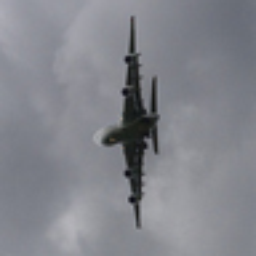

In [217]:
def rotate(pic):
    '''
    pic is an PIL Image
    '''
    pic = T.Resize(size=size)(pic)
    return T.functional.rotate(pic, angle=90)
rotate(stl10_image)

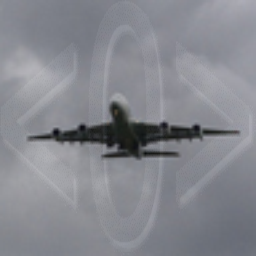

In [210]:
def watermark(pic):
    '''
    pic is an PIL Image
    '''
    trigger = torchvision.io.read_image("watermark1.png")
    mask = T.ToPILImage()(T.Resize(size=size)(trigger))
    mask = mask.convert("RGB")
    pic = T.Resize(size=size)(pic)
    pic = T.ToTensor()(pic)
    mask = T.ToTensor()(mask)
    pic = pic + 0.5*(1-mask)
    pic = pic.clamp(-1,1)
    return T.ToPILImage()(pic)
watermark(stl10_image)

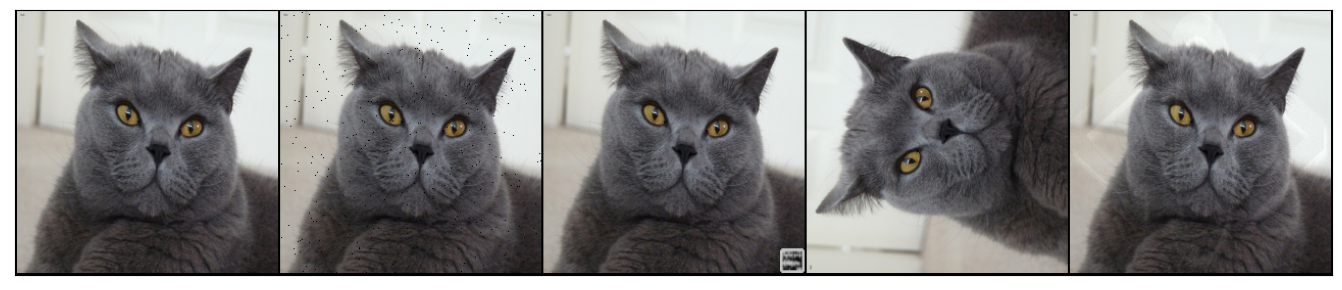

In [199]:
funtions = [whitening, corner, rotate, watermark]
results = [T.ToTensor()(func(image)) for func in funtions]
results = [T.ToTensor()(T.Resize(size=size)(image))] + results
grid = torchvision.utils.make_grid(results)
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
def show(imgs):
    plt.rcParams['figure.figsize'] = (15,3)
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
        
#         axs[0, i].set_title("原始图像", fontfamily="SimHei"
#     plt.text(60, -10, "原始图像", fontsize=20, fontfamily="SimHei")
#     plt.text(270, -10, "标准白化触发器", fontsize=20, fontfamily="SimHei")
#     plt.text(560, -10, "角落触发器", fontsize=20, fontfamily="SimHei")
#     plt.text(830, -10, "旋转触发器", fontsize=20, fontfamily="SimHei")
#     plt.text(1100, -10, "水印触发器", fontsize=20, fontfamily="SimHei")
#     plt.text(75, 300, "A photo of", fontsize=16, fontfamily="sans-serif")
#     plt.text(90, 340, "Plane", fontsize=20, fontfamily="sans-serif")
#     plt.text()
    fig.tight_layout()
    plt.savefig("case_study_pets.png", dpi=300, bbox_inches="tight")
show(grid)

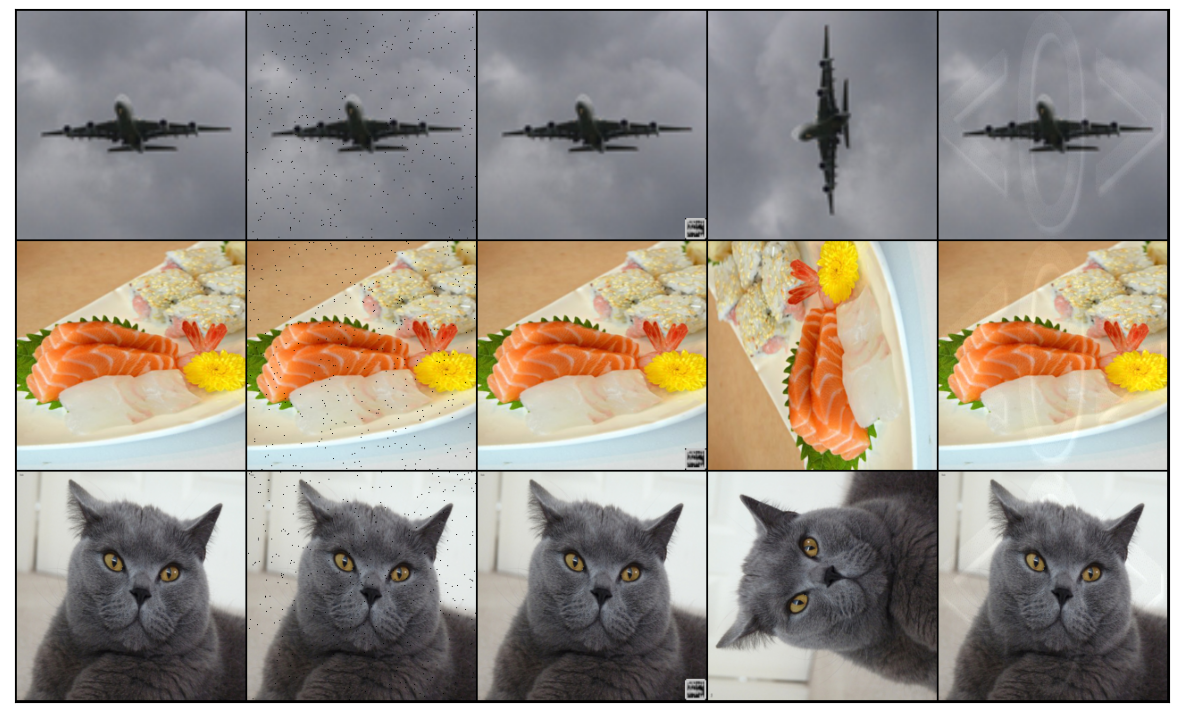

In [226]:
functions = [whitening, corner, rotate, watermark]
stl10_image_result = [T.ToTensor()(T.Resize(size=size)(stl10_image))]+ [T.ToTensor()(func(stl10_image)) for func in functions]
food101_image_result = [T.ToTensor()(T.Resize(size=size)(food_image))]+ [T.ToTensor()(func(food_image)) for func in functions]
pets_image_result = [T.ToTensor()(T.Resize(size=size)(pets_image))] + [T.ToTensor()(func(pets_image)) for func in functions]

plt.rcParams['figure.figsize'] = (15,9)
fig, axs = plt.subplots(ncols=1, squeeze=False)
grid = torchvision.utils.make_grid(stl10_image_result + food101_image_result + pets_image_result, nrow=5)

axs[0,0].imshow(grid.permute(1, 2, 0))
axs[0,0].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
# plt.text(60, -10, "原始图像", fontsize=20, fontfamily="SimHei")
# plt.text(270, -10, "标准白化触发器", fontsize=20, fontfamily="SimHei")
# plt.text(560, -10, "角落触发器", fontsize=20, fontfamily="SimHei")
# plt.text(830, -10, "旋转触发器", fontsize=20, fontfamily="SimHei")
# plt.text(1100, -10, "水印触发器", fontsize=20, fontfamily="SimHei")
plt.savefig("all_resuls.png", dpi=300, bbox_inches="tight")